In [35]:
import matplotlib.pyplot as plt
from math import sqrt
from PIL import Image, ImageDraw

In [36]:
%run utilities/fill_voronoi.py

########################################################
INSERT 1 in 0 x= 56.90821220930294
List at insert
[parent: False, focus: 0, edge: None]

#DISALING#
#END DISABLING#
########################################################
(2,)
(2,)
INSERT 2 in 1 x= 62.98458786749161
List at insert
[parent: True, focus: 0, edge: None]

0 -> 1 (orig = (-5845.185858249397, 816.9741868396346), dir = (735.0450249480729, -45.95001247627765))
[parent: True, focus: 1, edge: None]

0 -> 1 (orig = (-5845.185858249397, 816.9741868396346), dir = (-735.0450249480729, 45.95001247627765))
[parent: True, focus: 0, edge: None]

#DISALING#
#END DISABLING#
Checking 1 -> 2 (orig = (59.61296683878248, 818.9871773402438), dir = (-2.012990500609135, 6.076375658188674)) and 0 -> 1 (orig = (-5845.185858249397, 816.9741868396346), dir = (-735.0450249480729, 45.95001247627765))
I swear I didn't find anything
Checking 0 -> 1 (orig = (-5845.185858249397, 816.9741868396346), dir = (735.0450249480729, -45.95001247627765)) an

(2,)
(2,)
INSERT 14 in 12 x= 626.9965001727026
List at insert
[parent: True, focus: 0, edge: None]

0 -> 3 (orig = (41.823490221597126, 61.08663918390735), dir = (-20.842522707654453, -68.10877192845626))
[parent: True, focus: 3, edge: None]

3 -> 6 (orig = (296.6147220689587, 69.27348262967826), dir = (225.887579894479, -216.88634081449703))
[parent: True, focus: 6, edge: None]

6 -> 11 (orig = (396.8118693881735, 181.00154288088646), dir = (31.083308621663605, -152.02801682843648))
[parent: True, focus: 11, edge: None]

11 -> 13 (orig = (493.83808465968565, 228.97067370054137), dir = (-89.08685399950858, -146.05311041493786))
[parent: True, focus: 13, edge: None]

11 -> 13 (orig = (493.83808465968565, 228.97067370054137), dir = (89.08685399950858, 146.05311041493786))
[parent: True, focus: 11, edge: None]

11 -> 12 (orig = (456.5788184788452, 456.0290669880677), dir = (224.94078512342605, -116.0517247932741))
[parent: True, focus: 12, edge: None]

12 -> 10 (orig = (455.90019169700116

Checking 0 -> 3 (orig = (41.823490221597126, 61.08663918390735), dir = (-20.842522707654453, -68.10877192845626)) and 3 -> 13 (orig = (390.69704496079055, -21.059818372835736), dir = (167.88403451663402, -514.9674680578714))
I swear I didn't find anything
Checking 3 -> 13 (orig = (390.69704496079055, -21.059818372835736), dir = (167.88403451663402, -514.9674680578714)) and 13 -> 16 (orig = (619.3955415209848, 236.94501671959767), dir = (7.974343019056306, -51.94635393845226))
Will occur at x= 2728.588293759521
########################################################
DELETE  12 10 15 x= 774.2453845089946
List at delete
[parent: True, focus: 0, edge: None]

0 -> 3 (orig = (41.823490221597126, 61.08663918390735), dir = (-20.842522707654453, -68.10877192845626))
[parent: True, focus: 3, edge: None]

3 -> 13 (orig = (390.69704496079055, -21.059818372835736), dir = (167.88403451663402, -514.9674680578714))
[parent: True, focus: 13, edge: None]

13 -> 16 (orig = (619.3955415209848, 236.945016

In [ ]:
width = 300
N_X = 8

# find the height that yields the square-most texture
# we must ensure that N_Y is even for proper tiling
step_x = width / N_X
step_y = step_x * sqrt(3)/2

height = int(2 * step_y * (width // (2 * step_y)))
N_Y = int(height // step_y) + 1



In [ ]:
points.shape

In [ ]:
# Constructing points
# We first build a rectangular grid

xs = np.arange(width, step = step_x) # shape: N_X
ys = np.arange(height, step = step_y) # shape: N_Y

xv, yv = np.meshgrid(xs, ys) # shape of each : N_X, N_Y
points = np.stack((xv, yv), axis = 2) # shape N_X, N_Y, 2

# We now shift odd rows by half a step
points[1::2, :, 0] += step_x / 2

# We flatten the first two axis to get a list of points
points = np.reshape(points, (N_X * N_Y, 2))

In [ ]:
def small_pt(draw, pos, radius = 10):
    draw.ellipse((pos[0] - radius, pos[1] - radius, pos[0] + radius, pos[1] + radius),
                (255,255,255))

In [ ]:
img = Image.new("RGB", (width + 1, height + 1), (0,0,0))
draw = ImageDraw.Draw(img)

for i in range(points.shape[0]):
    small_pt(draw, points[i], radius = 2)

img

In [ ]:
# Jitter to avoid uniformity
points_jitter = points + np.random.normal(scale = 1/5. * step_x, size = points.shape)

# Create 9 copies of each points for tiling
decalX = np.array([width, 0.], dtype = "float")
decalY = np.array([0., height], dtype = "float")
points_jitter = np.concatenate([points_jitter + i * decalX + j * decalY for i in range(3) for j in range(3)])

# Jitter to avoid degenerates due to tiling
points_jitter = points_jitter + np.random.normal(scale = 1/100., size = points_jitter.shape)

voronoi = VoronoiFill(points_jitter.tolist())



In [ ]:
voronoi.compute_cells()
img = voronoi.fill_img((2*width, 2*height), center = (-0.5 * width, -0.5 * height))

In [ ]:
plt.imsave("test_texture.png", 1 - img[ : height, : width], cmap = "Greys")

In [ ]:
def plane(origin, normal, coords):
    dot_product = np.dot(coords - origin, normal) > 0
    
    plane = np.full_like(dot_product, 0.)
    plane[dot_product] = 1.
    
    return plane

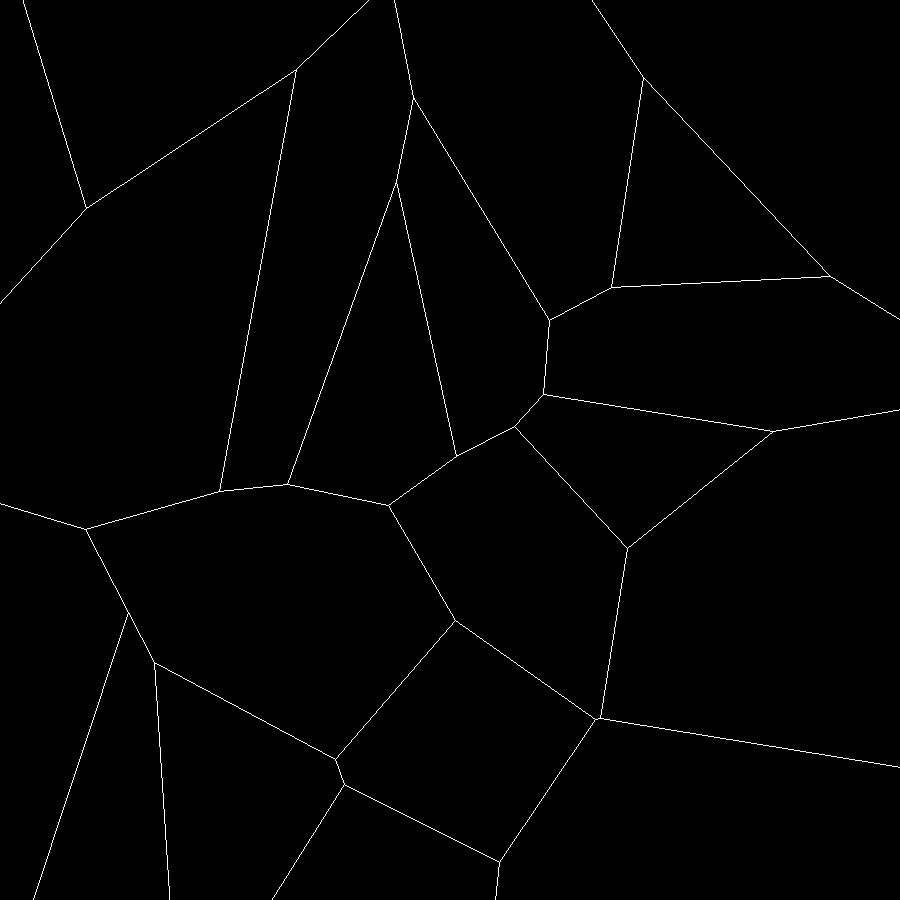

In [38]:
img

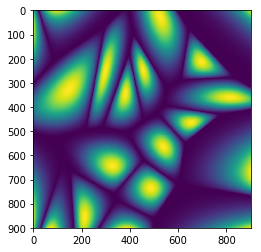

In [37]:
plt.imshow(voronoi.fill_img(size))

In [30]:
def fill_img2(voron, size):
    center = np.array([0.,0.])
    w, h = size

    img = np.full((w, h), 1.)

    # We create a coordinate array
    # Shape: w
    x = np.arange(w) + 0.5 - center[0]
    # Shape: h
    y = np.arange(h) + 0.5 - center[1]
    # Shapes: (w, h)
    xv, yv = np.meshgrid(x, y)

    # coordinate array
    # Shape: (w, h, 2)
    coords = np.stack((xv, yv), axis = 2)



    # Constructing masks for every cell

    for cell in voron.cells.values():

        cell.mask = np.full_like(img, 1.)
        cell.dists = []
        
        for edge in cell.edges:

            # Determining origin and inward-pointing normal of edge
            edge.origin = np.array(edge.origin)
            edge.normal = np.array([-edge.dir[1], edge.dir[0]])
            if np.dot(edge.normal, np.array(cell.pt) - edge.origin)  < 0:
                normal = - edge.normal
            else:
                normal = edge.normal

            # Multiplying positive value of plane
            dist = np.dot(coords - edge.origin, normal) / np.linalg.norm(normal)
            cell.dists.append(dist)

            mult = (dist >= 0).astype("float")
            cell.mask *= mult

    # Multiplying distances
    for cell in voron.cells.values():
        for edge, dist in zip(cell.edges, cell.dists):
            # Multiplying positive value of plane
            img *= cell.mask * dist + (1 - cell.mask) 

        # Cell-wise renormalization
        maximum = np.max(cell.mask * img)
        img /= cell.mask * maximum + (1 - cell.mask)
    return img

In [31]:
%timeit fill_img2(voronoi, size)

11.5 s ± 348 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%timeit voronoi.fill_img(size)

16.3 s ± 156 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
A = np.array([1.58, 0.67])
B = np.array([3.22, 1.65])
C = np.array([1.04, 3.13])
D = np.array([5.67, 1.79])


In [ ]:


def real_edge(pt1, pt2, boundary = False):
    toReturn = Edge(None, None, pt1, pt2 - pt1)
    if boundary:
        toReturn.add_boundary(pt2)
    return toReturn

In [ ]:
e1 = real_edge(A, B)
e2 = real_edge(C, D, True)

In [ ]:
e1.intersect(e2)

In [ ]:
e1.intersect_with_boundary(e2)

In [ ]:
img
#tile(img, 3 ,3)

    

In [ ]:
tile(img,2 ,2)

In [ ]:
a = np.array([2, 4 ,8])
a % 3

# Speed test

In [ ]:
import numpy as np

l = np.random.randint(15, size = (900, 900))
i_mask = np.random.randint(2, size = l.shape)
b_mask = (i_mask == 1)

def boolean_mask(n = 100):
    test = np.full_like(l, 0.)
    for i in range(n):
        test[b_mask] += l[b_mask]
    
def integer_mask(n = 100):
    test = np.full_like(l, 0.)
    for i in range(n):
        test += i_mask * l

In [ ]:
b_mask.astype("float")